---
---
# Proceso ETL - BANK


---
---

## Cargar librerías

- **Numpy:** para realizar cálculos numéricos eficientes y trabajar con matrices y arreglos multidimensionales.
- **Pandas**: para el análisis, manipulación y limpieza de conjuntos de datos.
- **Seaborn**: para crear rápidamente gráficos estadísticos.
- **Matplotlib**:  para crear gráficos estáticos, interactivos y de alta calidad.
- **StandardScaler:** para llevar a cabo la normalización de los datos en forma de escalar estándar.

In [324]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Cargar datasets y explorar los datos.

### Cargamos los 3 datasets

In [325]:
df_bankA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Miniproyecto1-final/bank-A.csv', sep=';')
df_bankB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Miniproyecto1-final/bank-B.csv', sep=',')
df_bankC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Miniproyecto1-final/bank-C.csv', sep=',')

### Visualizamos cada DF
- Mostramos los primeros registros de cada DF

In [326]:
df_bankA.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon
1,1536,1536,37.0,management,married,university.degree,no,yes,tue
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN


In [327]:
df_bankB.head()

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
0,2292,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN


In [328]:
df_bankC.head()

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
0,2292,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


### Mostramos la estructura de los DF
- Mostramos las columnas que conforman cada DF.

In [329]:
df_bankA.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week'],
      dtype='object')

In [330]:
df_bankB.columns

Index(['Unnamed: 0', 'id', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'age'],
      dtype='object')

In [331]:
df_bankC.columns

Index(['Unnamed: 0', 'id', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'contact'],
      dtype='object')

### Mostramos los tipos de datos de las columnas de los DF

In [332]:
df_bankA.dtypes

Unnamed: 0       int64
id               int64
age            float64
job             object
marital         object
education       object
default         object
housing         object
day_of_week     object
dtype: object

In [333]:
df_bankB.dtypes

Unnamed: 0       int64
id               int64
contact         object
month           object
day_of_week     object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
age            float64
dtype: object

In [334]:
df_bankC.dtypes

Unnamed: 0          int64
id                  int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
contact            object
dtype: object

### Resumen estadístico de las columnas de tipo "object"

In [335]:
df_bankA.describe(include=['object'])

,job,marital,education,default,housing,day_of_week
count,50,50,50,50,50,42
unique,8,3,7,2,3,5
top,blue-collar,married,university.degree,no,yes,wed
freq,13,29,15,37,27,11


In [336]:
df_bankB.describe(include=['object'])

,contact,month,day_of_week,poutcome
count,50,50,50,50
unique,3,6,6,3
top,cellular,may,wed,nonexistent
freq,26,20,13,44


In [337]:
df_bankC.describe(include=['object'])

,contact
count,50
unique,3
top,cellular
freq,26


### Resumen estadístico de las columnas numéricas

In [338]:
df_bankA.describe(include=np.number)

,Unnamed: 0,id,age
count,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,40.357143
std,1047.344129,1047.344129,9.084485
min,257.000000,257.000000,27.000000
25%,1553.750000,1553.750000,31.250000
50%,2486.000000,2486.000000,38.000000
75%,3407.000000,3407.000000,48.500000
max,4047.000000,4047.000000,57.000000


In [339]:
df_bankB.describe(include=np.number)

,Unnamed: 0,id,duration,campaign,pdays,previous,age
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,270.100000,2.280000,979.080000,0.120000,40.880952
std,1047.344129,1047.344129,204.363147,1.917056,140.855671,0.328261,9.292542
min,257.000000,257.000000,68.000000,1.000000,3.000000,0.000000,26.000000
25%,1553.750000,1553.750000,160.250000,1.000000,999.000000,0.000000,33.000000
50%,2486.000000,2486.000000,198.500000,2.000000,999.000000,0.000000,38.000000
75%,3407.000000,3407.000000,303.750000,3.000000,999.000000,0.000000,50.500000
max,4047.000000,4047.000000,1259.000000,12.000000,999.000000,1.000000,57.000000


In [340]:
df_bankC.describe(include=np.number)

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,4047.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


### Realizamos el cálculos de algunas Medidas de tendencia central
- Con la finalidad de resumir y representar el valor central o típico de los DF.
- Primero seleccionamos algunos campos numéricos de los DF, luego realizamos los cálculos de las medidas de tendencia central como Media, Mediana y  Moda.

- Podemos observar que la **Media es de 40.36**; esto significa que, en promedio, la edad de los clientes es de alrededor de **40.36 años.**
- La **Mediana con un valor de 38**; esto significa que la mitad de los clientes tienen una edad inferior a 38 años y la otra mitad tiene una edad superior.
- La **Moda con un valor de 30**; esto significa que la edad que más se repite es 30 años.

In [341]:
mean_age_dfA = df_bankA['age'].mean()
mediana_age_dfA = df_bankA['age'].median()
moda_age_dfA = df_bankA['age'].mode().values[0]

print("DataFrame df_bankA:")
print("Media de age:", mean_age_dfA)
print("Mediana de age:", mediana_age_dfA)
print("Moda de age:", moda_age_dfA)

DataFrame df_bankA:
Media de age: 40.357142857142854
Mediana de age: 38.0
Moda de age: 30.0


- La **Media es de 270.1**; esto significa que, en promedio, la duración de los contactos realizados es de aproximadamente 270.1 segundos.
- La **Mediana con un valor de 198.5**; indica que la mitad de los contactos tienen una duración inferior a 198.5 segundos y la otra mitad tiene una duración superior.
- La **Moda con un valor de 160**; el valor más común es 160 segundos, lo que indica que hay un número considerable de contactos con esta duración en el DF.

In [342]:
mean_duration_dfB = df_bankB['duration'].mean()
mediana_duration_dfB = df_bankB['duration'].median()
moda_duration_dfB = df_bankB['duration'].mode().values[0]

print("\nDataFrame df_bankB:")
print("Media de duration:", mean_duration_dfB)
print("Mediana de duration:", mediana_duration_dfB)
print("Moda de duration:", moda_duration_dfB)


DataFrame df_bankB:
Media de duration: 270.1
Mediana de duration: 198.5
Moda de duration: 160


- La **Media es de 0.324**; Esto significa que, en promedio, la tasa de variación del empleo es de aproximadamente 0.324
- La **Mediana con un valor de 1.1**; indica que la mitad de las tasas de variación son inferiores a 1.1 y la otra mitad es superior.
- La **Moda con un valor de 1.4**; el valor más común es 1.4

In [343]:
mean_emp_var_rate_dfC = df_bankC['emp.var.rate'].mean()
mediana_emp_var_rate_dfC = df_bankC['emp.var.rate'].median()
moda_emp_var_rate_dfC = df_bankC['emp.var.rate'].mode().values[0]

print("\nDataFrame df_bankC:")
print("Media de emp.var.rate:", mean_emp_var_rate_dfC)
print("Mediana de emp.var.rate:", mediana_emp_var_rate_dfC)
print("Moda de emp.var.rate:", moda_emp_var_rate_dfC)


DataFrame df_bankC:
Media de emp.var.rate: 0.3239999999999999
Mediana de emp.var.rate: 1.1
Moda de emp.var.rate: 1.4


### Ahora realizaremos los cálculos de algunas Medidas de dispersión de datos
- Con la finalidad de comprender la variabilidad o dispersión de los valores en los DF.

- La **desviación estándar es de 9.08**; nos indica que los valores de edad tienden a variar alrededor de 9.08 años con respecto a la media de edad.
- El **rango es 30.0**; indica que el rango total de edades es de 30 años.

In [344]:
std_age_dfA = df_bankA['age'].std()
rango_age_dfA = df_bankA['age'].max() - df_bankA['age'].min()

print("DataFrame df_bankA:")
print("Desviación estándar de age:", std_age_dfA)
print("Rango de age:", rango_age_dfA)

DataFrame df_bankA:
Desviación estándar de age: 9.084485376974303
Rango de age: 30.0


### Realizamos la representación gráfica de la Distribución de Edades (age)
- La línea central representa la mediana, los bordes de la caja representan el rango intercuartil (IQR), y los bigotes muestran la extensión de los datos hasta los valores no atípicos.

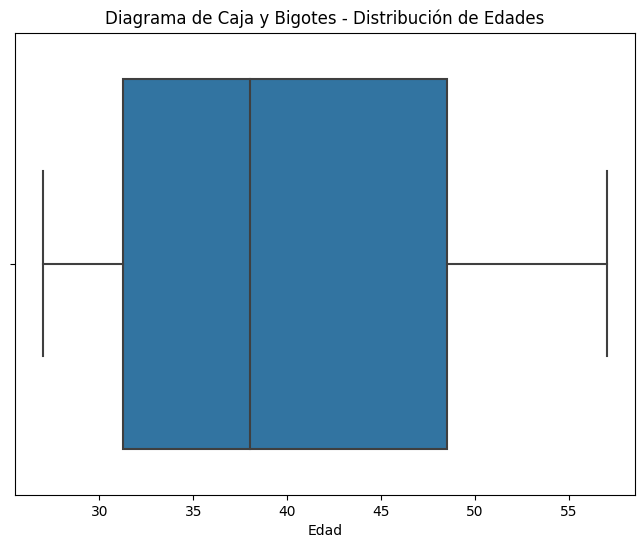

In [345]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_bankA['age'])
plt.xlabel('Edad')
plt.title('Diagrama de Caja y Bigotes - Distribución de Edades')
plt.show()

- La **desviación estándar es de 204.36**; nos dice que los valores de duración tienden a variar alrededor de 204.36 segundos con respecto a la media de duración.
- El **rango es 1191**; indica que el rango total de duraciones es de 1191 segundos.

In [346]:
std_duration_dfB = df_bankB['duration'].std()
rango_duration_dfB = df_bankB['duration'].max() - df_bankB['duration'].min()

print("DataFrame df_bankB:")
print("Desviación estándar de duration:", std_duration_dfB)
print("Rango de duration:", rango_duration_dfB)

DataFrame df_bankB:
Desviación estándar de duration: 204.3631471630033
Rango de duration: 1191


### Realizamos la representación gráfica de la Distribución de Duración (duration)
- La línea central representa la mediana, los bordes de la caja representan el rango intercuartil (IQR), y los bigotes muestran la extensión de los datos hasta los valores no atípicos.
- Los puntos fuera de los bigotes son valores atípicos.

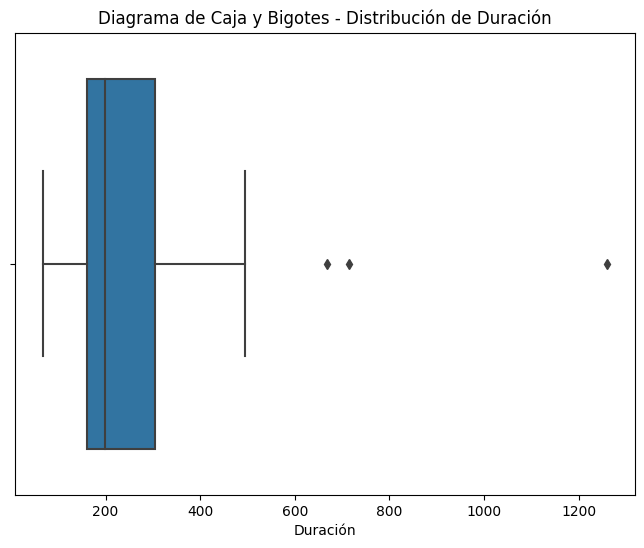

In [347]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_bankB['duration'])
plt.xlabel('Duración')
plt.title('Diagrama de Caja y Bigotes - Distribución de Duración')
plt.show()

- La **desviación estándar es de 1.39**; nos indica que los valores de emp.var.rate tienden a variar alrededor de 1.392 puntos porcentuales con respecto a la media de emp.var.rate.
- El **rango es 4.8**; indica que el rango total de la tasa de variación del empleo es de 4.8 puntos porcentuales.

In [348]:
std_emp_var_rate_dfC = df_bankC['emp.var.rate'].std()
rango_emp_var_rate_dfC = df_bankC['emp.var.rate'].max() - df_bankC['emp.var.rate'].min()

print("DataFrame df_bankC:")
print("Desviación estándar de emp.var.rate:", std_emp_var_rate_dfC)
print("Rango de emp.var.rate:", rango_emp_var_rate_dfC)

DataFrame df_bankC:
Desviación estándar de emp.var.rate: 1.3921881177132782
Rango de emp.var.rate: 4.8


### Realizamos la representación gráfica de la Distribución de emp.var.rate
- La línea central representa la mediana, los bordes de la caja representan el rango intercuartil (IQR), y los bigotes muestran la extensión de los datos hasta los valores no atípicos.
- Los puntos fuera de los bigotes son valores atípicos.

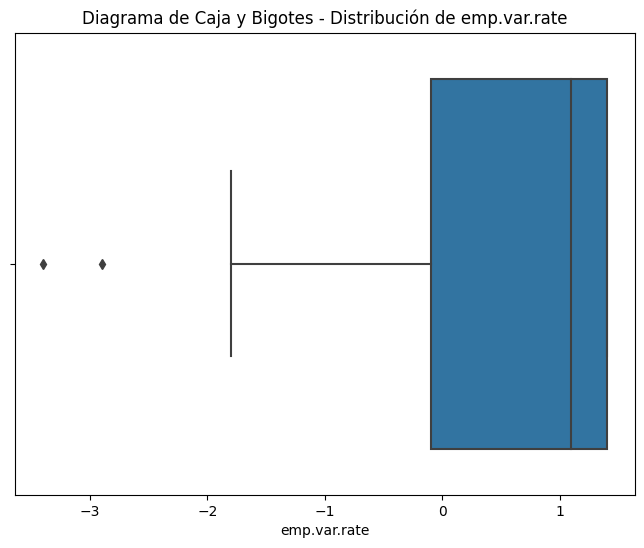

In [349]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_bankC['emp.var.rate'])
plt.xlabel('emp.var.rate')
plt.title('Diagrama de Caja y Bigotes - Distribución de emp.var.rate')
plt.show()

### Cantidad de valores únicos en cada columna de los DF
- Podemos observar que en los 3 DF la columna **id** tiene los valores únicos para cada registro.

In [350]:
df_bankA.nunique()

Unnamed: 0     50
id             50
age            21
job             8
marital         3
education       7
default         2
housing         3
day_of_week     5
dtype: int64

In [351]:
df_bankB.nunique()

Unnamed: 0     50
id             50
contact         3
month           6
day_of_week     6
duration       49
campaign        7
pdays           2
previous        2
poutcome        3
age            21
dtype: int64

In [352]:
df_bankC.nunique()

Unnamed: 0        50
id                50
emp.var.rate       6
cons.price.idx    10
cons.conf.idx     10
euribor3m         30
nr.employed        7
contact            3
dtype: int64

### Cantidad de valor NULL por columna de los DF
- Podemos observar que los DF de df_bankA y df_bankB tenemos presencia de valores nulos, mientras que en el df_bankC tenemos un dataset sin nulos.

In [353]:
df_bankA.isna().sum()

Unnamed: 0     0
id             0
age            8
job            0
marital        0
education      0
default        0
housing        0
day_of_week    8
dtype: int64

In [354]:
df_bankB.isna().sum()

Unnamed: 0     0
id             0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
age            8
dtype: int64

In [355]:
df_bankC.isna().sum()

Unnamed: 0        0
id                0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
contact           0
dtype: int64

### Analizaremos la Correlación entre las columnas numéricas de cada DF

#### Útil para el análisis de datos y comprender las relaciones entre las varibles de un DF.
- Nos ayudará a identificar patrones.

#### Analizamos la matriz de correlación en el DF de df_bankA
- En las áreas con colores intensos, significa que esas variables están fuertemente correlacionadas.
- Por otro lado, las áreas con colores claros o cercanos al blanco, indican que tiene una correlación baja o nula.

<ipython-input-356-06edb0c335da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_bankA.corr()


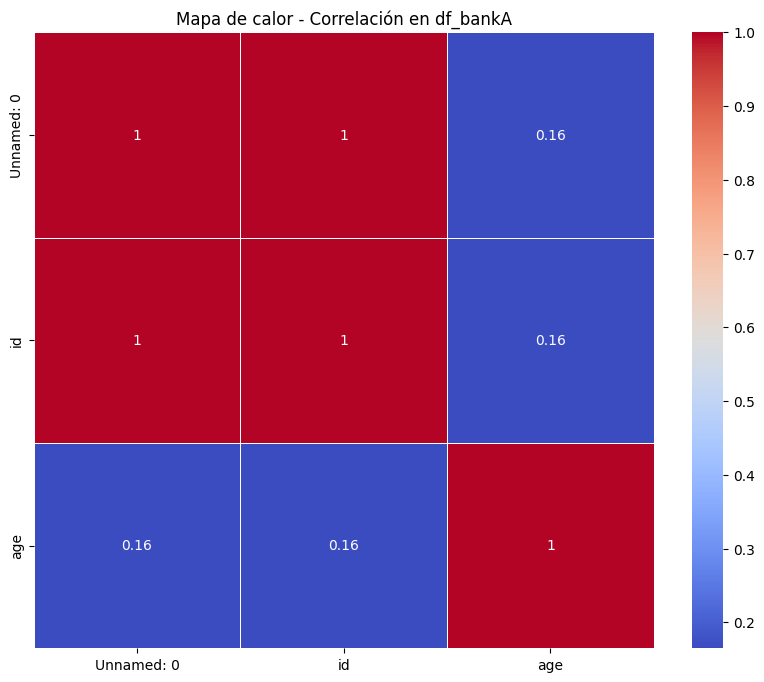

In [356]:
correlation_matrix = df_bankA.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor - Correlación en df_bankA')
plt.show()

##### **Interpretación:** Podemos observar que la variable "age" y "id" , indican una correlación negativa, esto quiere decir que cuando una variable tiende a disminuir la otra aumenta, y viceversa.

#### Analizamos la matriz de correlación en el DF de df_bankB
- En las áreas con colores intensos, significa que esas variables están fuertemente correlacionadas.
- Por otro lado, las áreas con colores claros o cercanos al blanco, indican que tiene una correlación baja o nula.

<ipython-input-357-99d401f4c2e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_bankB.corr()


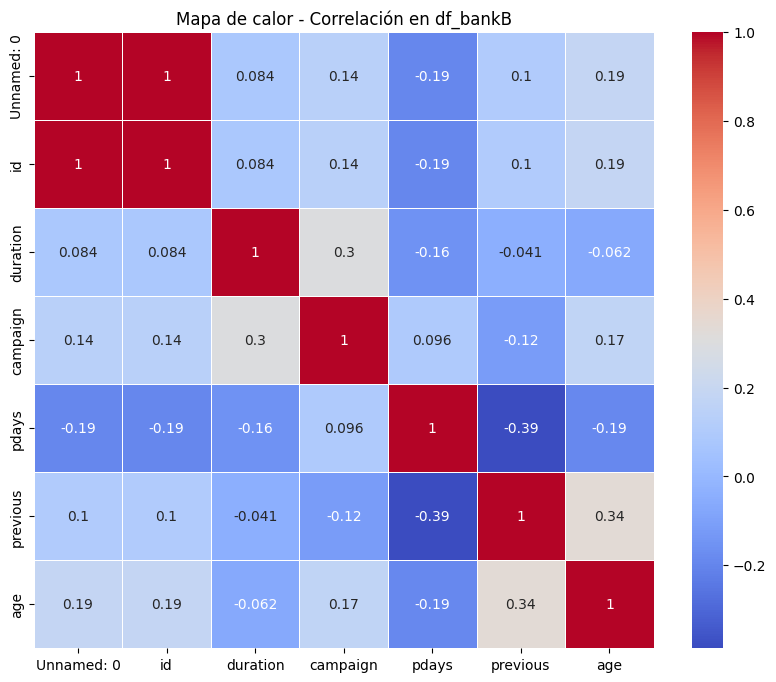

In [357]:
correlation_matrix = df_bankB.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor - Correlación en df_bankB')
plt.show()

##### **Interpretación:**
- Podemos observar que las variables "pdays" y "previous" , indican una correlación negativa, esto quiere decir que cuando una variable tiende a disminuir la otra aumenta, y viceversa.
- Existe una correlación débil entre las variables dee "duration" y "compaign".

#### Analizamos la matriz de correlación en el DF de df_bankC
- En las áreas con colores intensos, significa que esas variables están fuertemente correlacionadas.
- Por otro lado, las áreas con colores claros o cercanos al blanco, indican que tiene una correlación baja o nula.

<ipython-input-358-e942c16795d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_bankC.corr()


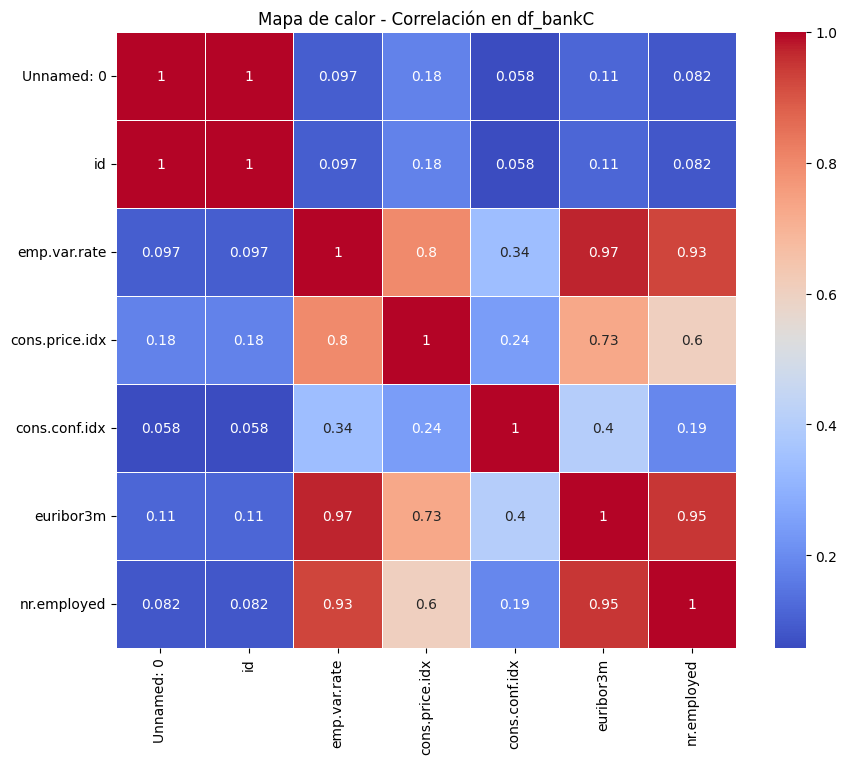

In [358]:
correlation_matrix = df_bankC.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor - Correlación en df_bankC')
plt.show()

##### **Interpretación:**
- Podemos destacar que existe una correlación fuerte entre las variables de "emp.var.rate" y "euribor3m", esto significa que cuando una variable aumenta, la otra tiende a aumentar también.

## Generar graficos que caractericen los datos

### Gráfico 1:
- Un **Histograma** que muestra la distribución de las edades. Cada barra en el histograma representa un rango de edades y la altura de la barra indica la frecuencia de ocurrencia de edades en ese rango.

#### Útil para obtener una visión clara de cómo se distribuyen las edades.
- Las edades de los clientes abarcan desde aproximadamente 20 años hasta 55 años, lo que indica que hay un rango amplio de edades representado en el conjunto de datos.
- Notamos un pico o una concentración de clientes en las edad de 30, 36 y 51 años aproximadamente.
- Podemos observar que la frecuencia mayor se dá en la edad de 30 años, mientras que la menor se dá en edades de 20 años aproximadamente.


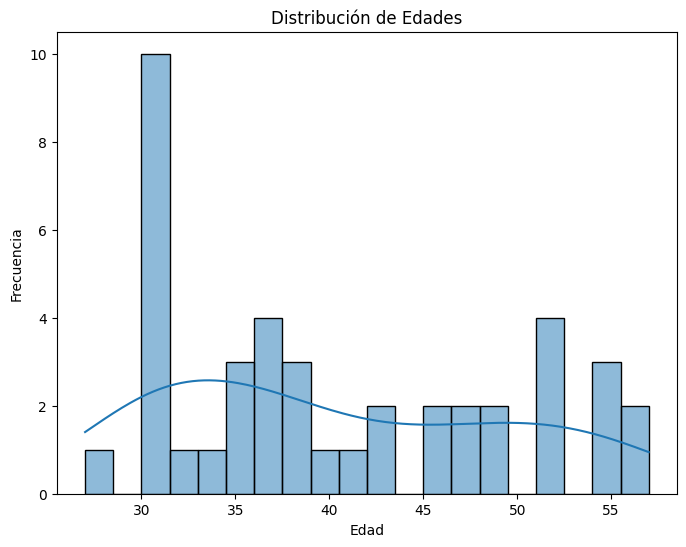

In [359]:
plt.figure(figsize=(8, 6))
sns.histplot(df_bankA['age'], bins=20, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()

#### **En conclusión**: Este conocimiento nos ayudará a comprender mejor la composición de las edades de los clientes y puede ser relevante para futuros análisis y toma de decisiones.

### Gráfico 2:
- **Gráfico de barras** que muestra la cantidad de clientes agrupados por categoría de trabajo. Cada barra representa una categoría de trabajo y su altura representa la cantidad de clientes que pertenecen a esa categoría específica.

#### Util para comparar la cantidad de clientes en diferentes categorías de trabajo y para identificar cuáles categorías tienen una mayor o menor presencia.
- Podemos observar que los trabajos **blue-collar** y **technician** son los que mayor cantidad de clientes trabaja.
- Mientras que la menor cantidad de clientes se ha retirado.






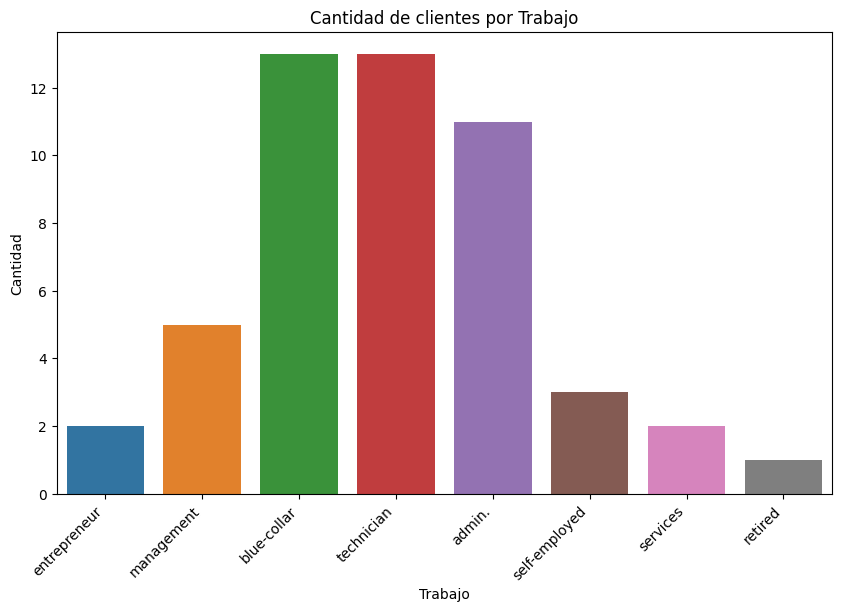

In [360]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df_bankA)
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.title('Cantidad de clientes por Trabajo')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **En Conclusión:** Permite tener una idea rápida de la distribución de clientes según su ocupación y puede ayudar a tomar decisiones informadas sobre segmentación de clientes o estrategias de marketing dirigidas a grupos específicos de trabajo.

### Gráfico complementario:
- **Histograma** de duraciones, nos proporciona información sobre la distribución de las duraciones de las llamadas.

#### útil para examinar la distribución de la duración de las llamadas realizadas.
- Las duraciones de llamdas abracan desde los 100 hasta los 1200 segundos aproximadamente.
- Podemos observar que la duración en segundos de las llamadas surge una frecuencia mayor en 200 aproximadamente.
- También se observa valores atípicos como duraciones de llamadas de aproximandamente 800 y 1200 segundos.

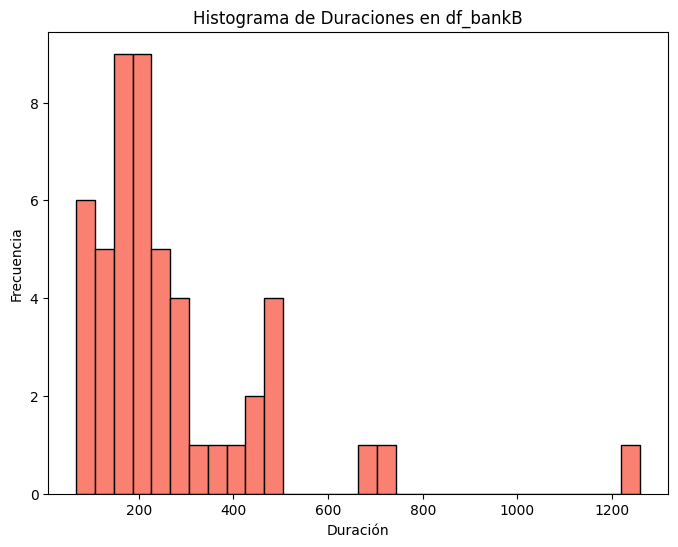

In [361]:
plt.figure(figsize=(8, 6))
plt.hist(df_bankB['duration'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duraciones en df_bankB')
plt.show()

#### **En Conclusión:** Permite identificar patrones o tendencia en la duración de las llamadas como también la selección de intervalos correctos.

## Unir datasets

### Atributo escogido:
- El atributo escogido para la unión es **'id'**. Esto significa que los DF se unirán utilizando la columna 'id' como clave de unión.
- En la exploración de datos pudimos observar que es un identificador único, siendo este un factor importante.


### Tipo de Unión:
- En este caso, se realizará una unión interna **(inner join)**. Esto significa que solo se incluirán las filas que tengan coincidencias en el atributo **'id'** en los tres DF. Es decir, solo se conservarán las filas que tengan un valor común en la columna **'id'.**

**Juntamos los 3 DF a partir del atributo "id"**

In [362]:
df_union = pd.merge(df_bankA, df_bankB, on='id', how='inner')
df_union = pd.merge(df_union, df_bankC, on='id', how='inner')
df_union.head()

,Unnamed: 0_x,id,age_x,job,marital,education,default,housing,day_of_week_x,Unnamed: 0_y,...,previous,poutcome,age_y,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,2292,...,1,failure,51.0,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,1536,...,0,nonexistent,37.0,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,4047,...,0,nonexistent,38.0,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,3862,...,1,success,52.0,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,1340,...,0,nonexistent,NaN,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


### Primero, comenzaremos con la columna "Unnamed"

- **Al ser 'Unnamed:0_x' es valor igual al atributo id y teniendo valor únicos, entonces no es necesario, ya que es información redundante, eliminamos la columna 'Unnamed:0_x','Unnamed:0_y' y 'Unnamed: 0'**

In [363]:
df_union = df_union.drop(labels=["Unnamed: 0_x","Unnamed: 0_y","Unnamed: 0"], axis=1)

### Ahora, trabajamos con el atributo "age"

**Primero, convertimos las columnas a cadenas y luego eliminamos los dos últimos caracteres de cada valor en ambas columnas, es decir el ".0"**

In [364]:
df_union['age_x'] = df_union['age_x'].astype(str).str[:-2]
df_union['age_y'] = df_union['age_y'].astype(str).str[:-2]
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,pdays,previous,poutcome,age_y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51,entrepreneur,divorced,university.degree,no,yes,mon,telephone,may,...,999,1,failure,51,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37,management,married,university.degree,no,yes,tue,cellular,aug,...,999,0,nonexistent,37,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38,blue-collar,married,basic.4y,unknown,no,wed,telephone,jun,...,999,0,nonexistent,38,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,n,technician,married,professional.course,no,yes,fri,cellular,nov,...,3,1,success,52,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32,admin.,married,university.degree,no,yes,NaN,cellular,aug,...,999,0,nonexistent,n,1.4,93.444,-36.1,4.964,5228.1,cellular


- **Reemplazamos los valores de la columna 'age_x' con los valores de la columna 'age_y' en las filas donde 'age_x' era igual a 'n'.**
- **En las filas donde 'age_x' y 'age_y' son diferentes, mantenemos el valor original de 'age_x'.**

In [365]:
nan = np.where(df_union['age_x']=='n', df_union['age_y'], df_union['age_x'])
df_union['age_x'] = np.where(df_union['age_x']==df_union['age_y'], df_union['age_x'], nan)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,pdays,previous,poutcome,age_y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51,entrepreneur,divorced,university.degree,no,yes,mon,telephone,may,...,999,1,failure,51,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37,management,married,university.degree,no,yes,tue,cellular,aug,...,999,0,nonexistent,37,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38,blue-collar,married,basic.4y,unknown,no,wed,telephone,jun,...,999,0,nonexistent,38,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52,technician,married,professional.course,no,yes,fri,cellular,nov,...,3,1,success,52,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32,admin.,married,university.degree,no,yes,NaN,cellular,aug,...,999,0,nonexistent,n,1.4,93.444,-36.1,4.964,5228.1,cellular


- **Ahora, creamos una función que concatenará el valor + 'year' y le aplicamos a cada registro del DF.**

In [366]:
def concatenar_years(age):
    return str(int(age.split()[0])) + ' years'

df_union['age_x'] = df_union['age_x'].apply(concatenar_years)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,pdays,previous,poutcome,age_y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university.degree,no,yes,mon,telephone,may,...,999,1,failure,51,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university.degree,no,yes,tue,cellular,aug,...,999,0,nonexistent,37,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic.4y,unknown,no,wed,telephone,jun,...,999,0,nonexistent,38,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional.course,no,yes,fri,cellular,nov,...,3,1,success,52,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university.degree,no,yes,NaN,cellular,aug,...,999,0,nonexistent,n,1.4,93.444,-36.1,4.964,5228.1,cellular


- **Ahora observamos que para la columna 'age_x' ya no hay ningún valor con 'n'.**

In [367]:
df_union.loc[df_union['age_x'] == 'n']

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,pdays,previous,poutcome,age_y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y


- **Eliminamos la columna 'age_y'**

In [368]:
df_union = df_union.drop(labels=["age_y"], axis=1)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university.degree,no,yes,mon,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university.degree,no,yes,tue,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic.4y,unknown,no,wed,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional.course,no,yes,fri,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university.degree,no,yes,NaN,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


### Ahora, trabajamos con el atributo "education"

- **Reemplazamos el '.' por un espacio para mostrar los valores correctamente.**
- **También reemplazamos los valor de 'unknown' por no 'No Aplica', con la finalidad de tener datos más limpios.**

In [369]:
df_union['education'] = df_union['education'].str.replace('.', ' ')
df_union['education'] = df_union['education'].str.replace('unknown', 'No aplica')
df_union.head()

<ipython-input-369-efc16d0d0f6a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_union['education'] = df_union['education'].str.replace('.', ' ')


,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,mon,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university degree,no,yes,tue,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic 4y,unknown,no,wed,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional course,no,yes,fri,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university degree,no,yes,NaN,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


### Ahora, trabajamos con el atributo "default"

- **Reemplazamos los valores 'unknown' por un espacio.**

In [370]:
df_union['default'] = df_union['default'].str.replace('unknown', ' ')
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,mon,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university degree,no,yes,tue,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic 4y,,no,wed,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional course,no,yes,fri,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university degree,no,yes,NaN,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


### Ahora, trabajamos con el atributo "housing"

- **Reemplazamos los valores 'unknown' por un espacio.**

In [371]:
df_union['housing'] = df_union['housing'].str.replace('unknown', ' ')
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,mon,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university degree,no,yes,tue,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic 4y,,no,wed,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional course,no,yes,fri,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university degree,no,yes,NaN,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


### Ahora, trabajamos con el atributo "day_of_week"


- **Reemplazamos los valores de la columna 'day_of_week_x' con los valores de la columna 'day_of_week_y' en las filas donde 'day_of_week_x' era igual es NULL.**
- **En las filas donde 'day_of_week_x' y 'day_of_week_y' son diferentes, mantenemos el valor original de 'day_of_week_x'.**
- **Luego, creamos un diccionario con los valores de que debe tomar cada día de la semana y mapeamos los nombres en el DF.**

In [372]:
nan = np.where(df_union['day_of_week_x'].isnull(), df_union['day_of_week_y'], df_union['day_of_week_x'])
df_union['day_of_week_x'] = np.where(df_union['day_of_week_x'] == df_union['day_of_week_y'], df_union['day_of_week_x'], nan)

dias_semana = {'mon': 'monday', 'tue': 'tuesday', 'wed': 'wednesday', 'thu': 'thursday', 'fri': 'friday'}
df_union['day_of_week_x'] = df_union['day_of_week_x'].map(dias_semana)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic 4y,,no,wednesday,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional course,no,yes,friday,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


- **Eliminamos la columna 'day_of_week_y'**

In [373]:
df_union = df_union.drop(labels=["day_of_week_y"], axis=1)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic 4y,,no,wednesday,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional course,no,yes,friday,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


### Ahora, trabajaremos con el atributo "contact"

- **Reemplazamos los valores de la columna 'contact_x' con los valores de la columna 'contact_y' en donde 'contact_x' era igual a '-'.**
- **En las filas donde 'contact_x' y 'contact_y' son diferentes, mantenemos el valor original de 'contact_x'.**

In [374]:
nan = np.where(df_union['contact_x']=='-', df_union['contact_y'], df_union['contact_x'])
df_union['contact_x'] = np.where(df_union['contact_x'] == df_union['contact_y'], df_union['contact_x'], nan)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,38 years,blue-collar,married,basic 4y,,no,wednesday,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,52 years,technician,married,professional course,no,yes,friday,cellular,nov,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,cellular


- **Eliminamos la columna 'contact_y'**

In [375]:
df_union = df_union.drop(labels=["contact_y"], axis=1)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,aug,263,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
2,4047,38 years,blue-collar,married,basic 4y,,no,wednesday,telephone,jun,95,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
3,3862,52 years,technician,married,professional course,no,yes,friday,cellular,nov,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,aug,428,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


### Ahora, trabajamos con el atributo "month"

- **Primero, mapeamos los nombres de los meses a sus nombres completos en un diccionario.**
- **Luego, realizamos la conversión en el DF utilizando el diccionario.**

In [376]:
nombre_meses = {
    'jan': 'january',
    'feb': 'february',
    'mar': 'march',
    'apr': 'april',
    'may': 'may',
    'jun': 'june',
    'jul': 'july',
    'aug': 'august',
    'sep': 'september',
    'oct': 'october',
    'nov': 'november',
    'dec': 'december'
}
df_union['month'] = df_union['month'].map(nombre_meses)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,august,263,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
2,4047,38 years,blue-collar,married,basic 4y,,no,wednesday,telephone,june,95,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
3,3862,52 years,technician,married,professional course,no,yes,friday,cellular,november,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,august,428,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


### Ahora, trabajamos con el atributo "poutcome"

- **Primero, ponemos los valores de 'poutcome' a los valores deseados en un diccionario.**
- **Luego, realizamos la conversión utilizando el diccionario**

In [377]:
poutcome_valores = {
    'nonexistent': 'not existent'
}
df_union['poutcome'] = df_union['poutcome'].replace(poutcome_valores)
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,august,263,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1
2,4047,38 years,blue-collar,married,basic 4y,,no,wednesday,telephone,june,95,2,999,0,not existent,1.4,94.465,-41.8,4.959,5228.1
3,3862,52 years,technician,married,professional course,no,yes,friday,cellular,november,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,august,428,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1


### Selección de datos

- **Como pudimos observar en la exploración de los datos, en el atributo 'duration' contiene datos atípicos.**
- **Para esto, debemos seleccionar datos coherentes**
- **Seleccionaremos la duración de llamada >=150 y <=450**

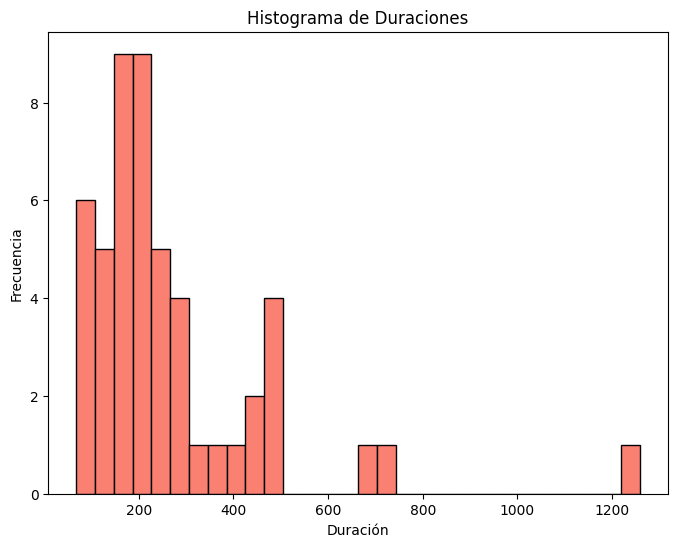

In [378]:
plt.figure(figsize=(8, 6))
plt.hist(df_union['duration'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duraciones')
plt.show()

In [379]:
filtro_duracion = (df_union['duration'] >= 150) & (df_union['duration'] <= 450)
df_union = df_union[filtro_duracion]
df_union.head()

,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,august,263,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,august,428,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1
5,3686,45 years,technician,married,basic 9y,,no,friday,cellular,november,174,1,999,0,not existent,-0.1,93.200,-42.0,4.021,5195.8
6,1565,38 years,admin.,single,university degree,no,yes,monday,telephone,july,195,2,999,0,not existent,-2.9,92.469,-33.6,0.914,5076.2


### Renombramos las columnas

- **Renombramos los nombres de las columnas a uno adecuado, para eso definimos un diccionario con los valores y renombramos en el DF.**

In [380]:
columnas = {      'id': 'id',
                  'age_x': 'age',
                  'job': 'job',
                  'marital': 'marital',
                  'education': 'education',
                  'default': 'default',
                  'housing': 'housing',
                  'day_of_week_x': 'day_of_week',
                  'contact_x': 'contact',
                  'month': 'month',
                  'duration': 'duration',
                  'campaign': 'campaign',
                  'pdays': 'pdays',
                  'previous': 'previous',
                  'poutcome': 'poutcome',
                  'emp.var.rate': 'emp_var_rate',
                  'cons.price.idx': 'cons_price_idx',
                  'cons.conf.idx': 'cons_conf_idx',
                  'euribor3m': 'euribor3m',
                  'nr.employed': 'nr_employed'}
df_union.rename(columns=columnas, inplace=True)
df_union.columns

<ipython-input-380-361a78e8fc4c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_union.rename(columns=columnas, inplace=True)


Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'day_of_week', 'contact', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

## Transformar a formato pedido en tabla output.csv

### Al tener nuestro DF ya transformado y limpio, podemos seguir con la aplicación de ls normalización.

In [381]:
df_union.head()

,id,age,job,marital,education,default,housing,day_of_week,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,august,263,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,august,428,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1
5,3686,45 years,technician,married,basic 9y,,no,friday,cellular,november,174,1,999,0,not existent,-0.1,93.200,-42.0,4.021,5195.8
6,1565,38 years,admin.,single,university degree,no,yes,monday,telephone,july,195,2,999,0,not existent,-2.9,92.469,-33.6,0.914,5076.2


### Normalización de datos numéricos
- Dado que estamos trabajando con columnas que contienen valores numéricos con diferentes escalas y magnitudes, la normalización de **escala estándar(Z-Score Normalization)**, es una opción adecuada para este caso.

#### **Justificación de la elección:**
- Las columnas como 'duration', 'pdays', 'euribor3m' y 'nr_employed' tienen valores con magnitudes significativamente diferentes. Esto podría afectar el rendimiento de algoritmos sensibles a la escala, por lo que la normalización de escala estándar ayudaría a mitigar este problema.

- **Entonces, primero definimos las columnas numéricas de nuestro DF.**
- **Luego, creación un objeto StandarScaler, ajustamos y transformamos los datos.**

In [382]:
columnas_numericas = ['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

scaler = StandardScaler()
df_union[columnas_numericas] = scaler.fit_transform(df_union[columnas_numericas])
df_union.head()

<ipython-input-382-b14ee016a8b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_union[columnas_numericas] = scaler.fit_transform(df_union[columnas_numericas])


,id,age,job,marital,education,default,housing,day_of_week,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,2292,51 years,entrepreneur,divorced,university degree,no,yes,monday,telephone,may,-0.126740,-0.944911,0.0,2.645751,failure,-1.617331,-1.426642,-1.671815,-1.765854,-1.449055
1,1536,37 years,management,married,university degree,no,yes,tuesday,cellular,august,0.271364,-0.188982,0.0,-0.377964,not existent,0.814603,-0.272181,0.875713,0.664775,0.903999
4,1340,32 years,admin.,married,university degree,no,yes,wednesday,cellular,august,2.324091,1.322876,0.0,-0.377964,not existent,0.814603,-0.272181,0.875713,0.662125,0.903999
5,3686,45 years,technician,married,basic 9y,,no,friday,cellular,november,-0.835864,-0.944911,0.0,-0.377964,not existent,-0.325366,-0.783413,-0.612447,0.037409,0.314824
6,1565,38 years,admin.,single,university degree,no,yes,monday,telephone,july,-0.574608,-0.188982,0.0,-0.377964,not existent,-2.453308,-2.315012,1.506289,-2.020908,-1.866768


### Mostramos un histograma de cada atributo numérico normalizado.

<Figure size 1000x600 with 0 Axes>

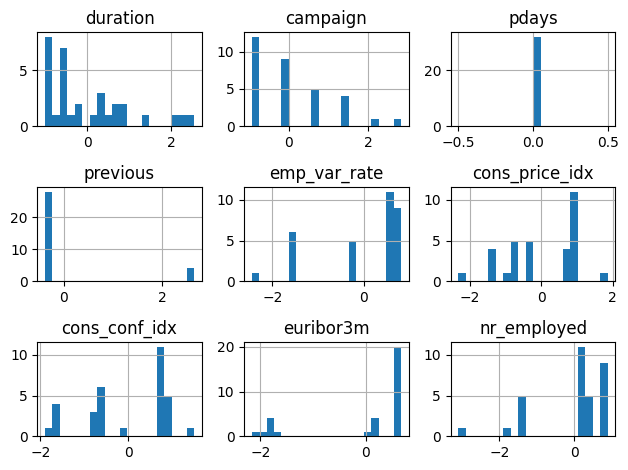

In [383]:
plt.figure(figsize=(10, 6))
df_union.drop('id', axis=1).hist(bins=20)  # Excluye la columna 'id'
plt.tight_layout()
plt.show()

### Guardamos el DF en un archivo con extensión .csv en la ruta especificada y eliminamos los índices.

In [384]:
df_union.to_csv("/content/drive/MyDrive/Colab Notebooks/Miniproyecto1-final/output_cygs.csv", index=False)